# Iris Flower - Batch Prediction


In this notebook we will, 

1. Load the batch inference data that arrived in the last 24 hours
2. Predict the first Iris Flower found in the batch
3. Write the ouput png of the Iris flower predicted, to be displayed in Github Pages.

In [1]:
import pandas as pd
import hopsworks
import joblib

project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/17559
Connected. Call `.close()` to terminate connection gracefully.


In [81]:
mr = project.get_model_registry()
model = mr.get_model("iris", version=2)
model_dir = model.download()
model = joblib.load(model_dir + "/iris_model.pkl")

Connected. Call `.close()` to terminate connection gracefully.

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training. 

So, let's download the iris dataset, and preview some rows. 

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [82]:
feature_view = fs.get_feature_view(name="iris", version=1)

Now we will do some **Batch Inference**. 

We will read all the input features that have arrived in the last 24 hours, and score them.

In [83]:
import datetime
from PIL import Image

batch_data = feature_view.get_batch_data()

y_pred = model.predict(batch_data)

y_pred

2023-02-01 10:02:52,642 INFO: USE `serverlessml_iris_featurestore`
2023-02-01 10:02:52,999 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`
FROM `serverlessml_iris_featurestore`.`iris_1` `fg0`


array(['Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Versicol

In [84]:
batch_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.700000,3.800000,1.700000,0.300000
1,5.600000,2.700000,4.200000,1.300000
2,6.300000,3.300000,6.000000,2.500000
3,6.000000,2.900000,4.500000,1.500000
4,5.000000,3.000000,1.600000,0.200000
...,...,...,...,...
151,5.115330,4.105785,1.838620,0.401155
152,6.361603,3.204659,5.573411,2.203084
153,5.646322,3.368595,1.846382,0.681796
154,7.661604,2.754621,4.956456,1.668093


Batch prediction output is the last entry in the batch - it is output as a file 'latest_iris.png'

In [85]:
flower = y_pred[y_pred.size-1]
flower_img = "assets/" + flower + ".png"
img = Image.open(flower_img)            

img.save("../../assets/latest_iris.png")

In [86]:
iris_fg = fs.get_feature_group(name="iris", version=1)
df = iris_fg.read()
df

2023-02-01 10:03:07,179 INFO: USE `serverlessml_iris_featurestore`
2023-02-01 10:03:07,825 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`, `fg0`.`variety` `variety`
FROM `serverlessml_iris_featurestore`.`iris_1` `fg0`


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.700000,3.800000,1.700000,0.300000,Setosa
1,5.600000,2.700000,4.200000,1.300000,Versicolor
2,6.300000,3.300000,6.000000,2.500000,Virginica
3,6.000000,2.900000,4.500000,1.500000,Versicolor
4,5.000000,3.000000,1.600000,0.200000,Setosa
...,...,...,...,...,...
151,5.115330,4.105785,1.838620,0.401155,Setosa
152,6.361603,3.204659,5.573411,2.203084,Virginica
153,5.646322,3.368595,1.846382,0.681796,Setosa
154,7.661604,2.754621,4.956456,1.668093,Virginica


In [87]:
label = df.iloc[-1]["variety"]
label

'Virginica'

In [88]:
label_flower = "assets/" + label + ".png"

img = Image.open(label_flower)            

img.save("../../assets/actual_iris.png")

In [89]:
import pandas as pd

monitor_fg = fs.get_or_create_feature_group(name="iris_predictions",
                                  version=2,
                                  primary_key=["datetime","sepal_length","sepal_width","petal_length","petal_width"],
                                  description="Iris flower Prediction/Outcome Monitoring"
                                 )

In [90]:
from datetime import datetime
now = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")

data = {
    'prediction': [flower],
    'label': [label],
    'datetime': [now],
    'sepal_width': [df.iloc[-1]['sepal_width']],
    'sepal_length': [df.iloc[-1]['sepal_length']],
    'petal_width': [df.iloc[-1]['petal_width']],
    'petal_length': [df.iloc[-1]['petal_length']],
    
    
}
monitor_df = pd.DataFrame(data)
monitor_fg.insert(monitor_df)

Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/17559/jobs/named/iris_predictions_2_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x2300e75d4c0>, None)

In [91]:
history_df = monitor_fg.read()
history_df

2023-02-01 10:04:21,224 INFO: USE `serverlessml_iris_featurestore`
2023-02-01 10:04:21,569 INFO: SELECT `fg0`.`prediction` `prediction`, `fg0`.`label` `label`, `fg0`.`datetime` `datetime`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`sepal_length` `sepal_length`, `fg0`.`petal_width` `petal_width`, `fg0`.`petal_length` `petal_length`
FROM `serverlessml_iris_featurestore`.`iris_predictions_2` `fg0`


,prediction,label,datetime,sepal_width,sepal_length,petal_width,petal_length
0,Versicolor,Versicolor,"02/01/2023, 09:33:00",2.344896,5.322544,1.787249,4.102035
1,Setosa,Versicolor,"02/01/2023, 09:41:03",2.344896,5.322544,1.787249,4.102035
2,Setosa,Setosa,"02/01/2023, 09:44:17",3.368595,5.646322,0.681796,1.846382
3,Virginica,Virginica,"02/01/2023, 09:47:41",3.430504,7.675354,1.510862,5.238275
4,Virginica,Virginica,"02/01/2023, 10:03:17",3.430504,7.675354,1.510862,5.238275


In [92]:
import dataframe_image as dfi

df_recent = history_df.tail(5)
 
# If you exclude this image, you may have the same iris_latest.png and iris_actual.png files
# If no files have changed, the GH-action 'git commit/push' stage fails, failing your GH action (last step)
# This image, however, is always new, ensuring git commit/push will succeed.
dfi.export(df_recent, '../../assets/df_recent.png', table_conversion = 'matplotlib')

In [93]:
from sklearn.metrics import confusion_matrix

predictions = history_df[['prediction']]
labels = history_df[['label']]

results = confusion_matrix(labels, predictions)
print(results)

[[1 0 0]
 [1 1 0]
 [0 0 2]]


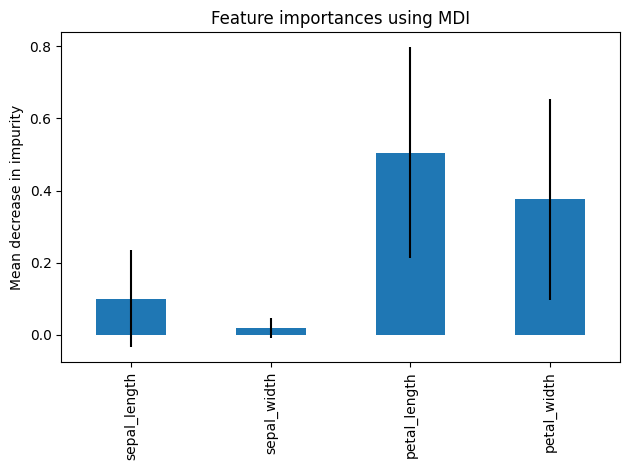

In [104]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=batch_data.keys())

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

fig.savefig("../../assets/feature_importance.png")

In [94]:
model.feature_importances_

array([0.09998261, 0.01954979, 0.50495526, 0.37551233])

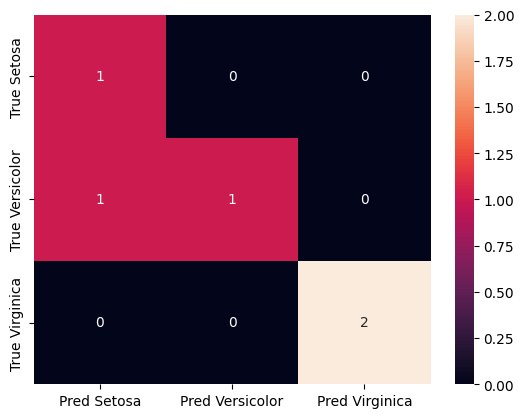

In [103]:
import seaborn as sns

# Only create the confusion matrix when our iris_predictions feature group has examples of all 3 iris flowers
if results.shape == (3,3):

    df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                         ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

    cm = sns.heatmap(df_cm, annot=True)

    fig = cm.get_figure()
    fig.savefig("../../assets/confusion_matrix.png") 
    df_cm
else:
    print("Run the batch inference pipeline more times until you get 3 different iris flowers")    